In [ ]:
from matplotlib import rc
import os

rc('font', family='AppleGothic')

path = '/Users/jsha/gjai/nlp/pytest/'
working_dir = '/Users/jsha/gjai/nlp/pytest/18_practice/'



In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(test_images.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [2]:
from keras import models
from keras import layers
import numpy as np

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1),
                       activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=2)) # 1/2로 줄이겠다. 전체적으로 1/4로 만들겠다. 75% 날리겠다.
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [3]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
             metrics=['acc'])

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images = train_images.reshape((60000,28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,28, 28, 1))
test_images = test_images.astype('float32') / 255

In [6]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
test_labels.shape

(10000, 10)

In [8]:
history = model.fit(train_images, train_labels, epochs=10,
                   batch_size=128, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
469/469 [==============================] - 159s 337ms/step - loss: 0.1748 - acc: 0.9466 - val_loss: 0.0496 - val_acc: 0.9854
Epoch 2/10
469/469 [==============================] - 163s 347ms/step - loss: 0.0565 - acc: 0.9827 - val_loss: 0.0389 - val_acc: 0.9870
Epoch 3/10
469/469 [==============================] - 158s 337ms/step - loss: 0.0413 - acc: 0.9875 - val_loss: 0.0318 - val_acc: 0.9897
Epoch 4/10
469/469 [==============================] - 157s 334ms/step - loss: 0.0330 - acc: 0.9901 - val_loss: 0.0292 - val_acc: 0.9912
Epoch 5/10
469/469 [==============================] - 157s 335ms/step - loss: 0.0283 - acc: 0.9912 - val_loss: 0.0293 - val_acc: 0.9907
Epoch 6/10
469/469 [==============================] - 157s 335ms/step - loss: 0.0250 - acc: 0.9922 - val_loss: 0.0368 - val_acc: 0.9894
Epoch 7/10
469/469 [==============================] - 158s 336ms/step - loss: 0.0233 - acc: 0.9929 - val_loss: 0.0266 - val_acc: 0.9917
Epoch 8/10
469/469 [============================

In [ ]:
### 주피터에서 자꾸 죽는 이유는??
- 코랩에서 하니까 돌아가긴 하는데~~
- 데이터 크기를 1/3으로 줄여봐.
- google drive class7_2/18_cnn.ipynb 참고할 것. 이건 완성됨.

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc', test_acc)

313/313 [==============================] - 8s 24ms/step - loss: 0.0296 - acc: 0.9923
test_acc 0.9922999739646912


In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

print('Validation Accuracy of each epoch:', val_acc)
print('Validation Loss of each epoch:', val_loss)
epochs = range(1, len(acc)+1)

Validation Accuracy of each epoch: [0.9854000210762024, 0.9869999885559082, 0.9897000193595886, 0.9911999702453613, 0.9907000064849854, 0.9894000291824341, 0.9916999936103821, 0.991100013256073, 0.9887999892234802, 0.9922999739646912]
Validation Loss of each epoch: [0.04958544671535492, 0.03888675197958946, 0.031806208193302155, 0.02919691987335682, 0.02929016202688217, 0.036772582679986954, 0.026585590094327927, 0.02965059131383896, 0.03774413838982582, 0.02961128018796444]


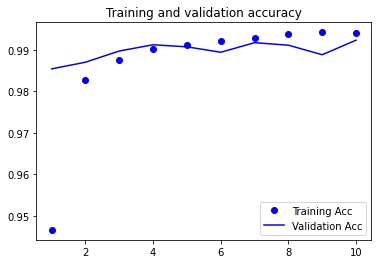

In [13]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

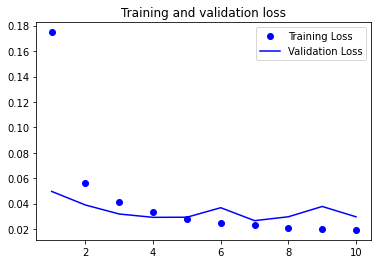

In [14]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()